# Market Basket Analysis
### November 10, 2020
### Marc Gottleib, Rebecca Gartenberg, Sophie Jaro

In this project, we selected the dataset Divorce Predictors. We performed market basket anaylsis 

Select a dataset of interest to you and perform a market basket analysis, including finding frequent itemsets and mining association rules. Do not use a shopping cart dataset - select(or create) another kind of dataset and think of how to frame it as a market basket problem. You can use whatever implemtation of the A Priori algorithm you want, from the book, from here: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/, or anything else you find.

This assignment is a little more subjective than previous assignments. Before starting, discuss your dataset with me. You will be graded on the quality of your explanation as well as the code. There are no performance goals to meet as this is a data mining project, but the model does need to be carefuly tuned to select frequent itemsets and association rules with high support, confidence and lift.  Your write-up should discuss what dataset you chose and why, what parameters you selected and why, give examples of itemsets and rules. You should wrap it up with a conclusion about what you 'discovered' about this dataset using this method.


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

# Info about the dataset
The data used in this project is a divorce predictor dataset. Each of the 54 predictors are statements related to relationships between spouses which can be rated on a scale from 0-4 where 0 means disagree and 4 means agree. Examples of some predictors include "I know my spouse very well" and "I'm not the one who's wrong about problems at home".

In [ ]:
data = pd.read_csv (r'divorceData.csv') # https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#
features = pd.read_csv (r'divorcePredictors.csv')

# Make data an array
data_array = np.array(data)
data_array = data_array[:,0:54] # removing last column of labels
features = np.array(features)


# Framing the dataset as a market basket
In order to frame this dataset as a market basket problem, the features needed to have a binary value - true or false. One way to convert our 5 valued predictors to binary values is to simply split the data on a threshold. More specifically, values 0-1 would become 0 and values 2-4 would become 1. This method loses some information, but is simple and is a good approximation if most of the data points for a given predictor have values at 0 and 4. Another method for converting the data to binary values, which better preserves information is to one-hot encode the values for each feature. With this method, one feature would become 5 features where 1 value is a 1 and the rest are 0's for a given data point. For example, if predictor "I know my spouse very well" has a value of 2, then it becomes 5 predictors with the following values: [0,1,0,0,0]. 

In order to determine which method would be most useful for each predictor, a histogram was plotted for each predictor. If the data was mostly polarized at 0 and 4, the threholding method was used. If the data was split more uniformly, the one-hot encoding method was used. The predictors that were one-hot encoded were the ones at indices 1,2,5,6,11,47,48,49,50,51,52 (add 1 to see the predictor on the list at UCI website). The histograms can be seen in figure 1 below.

Figure 1: Histograms of values of all features


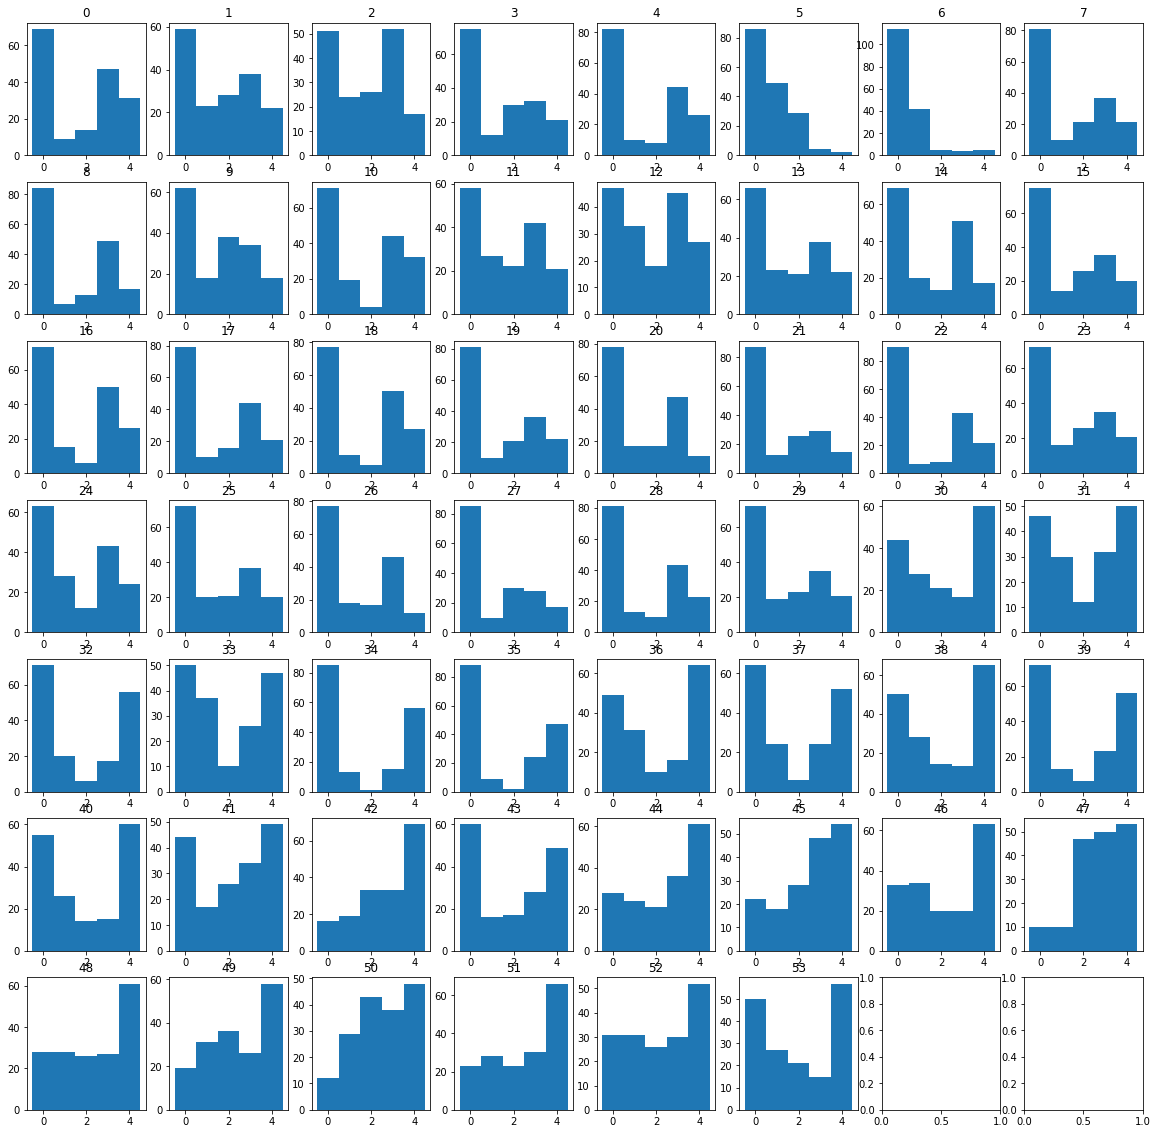

In [ ]:
# Plotting histograms
print('Figure 1: Histograms of values of all features')
fig, axs = plt.subplots(7, 8, figsize=(20,20))

j = 0
for i in range(len(data_array[1])):
  if i % 8 == 0 and i != 0:
    j = j + 1
  x = data_array[:,i]
  #  code source: https://bugsdb.com/_en/debug/1e1182cf376193d8de53bd311a279eb0
  d = np.diff(np.unique(x)).min()
  left_of_first_bin = x.min() - float(d)/2
  right_of_last_bin = x.max() + float(d)/2
  #plt.hist(x, np.arange(left_of_first_bin, right_of_last_bin + d, d))
  axs[j,i % 8].hist(x, np.arange(left_of_first_bin, right_of_last_bin + d, d))
  axs[j,i % 8].set_title(i)

# want to one hot encode : 1,2,5,6,11,47,48,49,50,51,52
  



In [ ]:
# One-hot enconding and thresholding features

one_hot = [1,2,5,6,11,47,48,49,50,51,52]
y = OneHotEncoder().fit_transform(data_array).toarray()

new_data_array = np.zeros((170,98))
j = 0
for i in range(len(data_array[1])):
  if i in one_hot:
    new_data_array[:,j] = y[:,i*5]
    new_data_array[:,j+1] = y[:,i*5+1]
    new_data_array[:,j+2] = y[:,i*5+2]
    new_data_array[:,j+3] = y[:,i*5+3]
    new_data_array[:,j+4] = y[:,i*5+4]
    j = j+5
  else:
    data_array[data_array[:,i] <= 1] = 0
    data_array[data_array[:,i] > 1] = 1
    new_data_array[:,j] = data_array[:,i]
    j = j+1
    
df = pd.DataFrame(new_data_array)
print('Figure 2: Feature Matrix (170 x 98)')
display(df)

Figure 2: Feature Matrix (170 x 98)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
166,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
167,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
168,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Analyzing the dataset

We chose a minimum support of 0.32 for itemsets because this was the highest support that contained itemsets with multiple features. Our feature matrix was sparse and we had only 170 datapoints. Table 1 shows all of the itemsets with supports greater than 0.32. Our minimum confidence was 0.5 because anything below that would show low confidence rules. The lift for all of the rules were greater than 1 and below 3, showing association between two features. Table 2 shows the association rules for itemsets with confidence greater than 0.32 along with the confidence and lift. Below, we analyze these association rules.

In [ ]:
x = apriori(df, min_support=0.32)
print('Table 1: Itemsets and Supports')
display(x)
min_confidence = 0.5
rules = association_rules(x, metric="confidence", min_threshold = min_confidence)
rules[ (rules['lift'] >= 2.5) &(rules['confidence'] >= 0.8)]
rules = rules[["antecedents","consequents","antecedent support","consequent support","support","confidence","lift"]]
print('\n')
print('Table 2: Association Rules')
display(rules)

Table 1: Itemsets and Supports


,support,itemsets
0,0.541176,(0)
1,0.347059,(1)
2,0.505882,(13)
3,0.670588,(18)
4,0.341176,(27)
5,0.358824,(76)
6,0.341176,(81)
7,0.388235,(91)
8,0.335294,"(0, 76)"
9,0.329412,"(0, 81)"




Table 2: Association Rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(0),(76),0.541176,0.358824,0.335294,0.619565,1.726657
1,(76),(0),0.358824,0.541176,0.335294,0.934426,1.726657
2,(0),(81),0.541176,0.341176,0.329412,0.608696,1.784108
3,(81),(0),0.341176,0.541176,0.329412,0.965517,1.784108
4,(0),(91),0.541176,0.388235,0.335294,0.619565,1.595850
5,(91),(0),0.388235,0.541176,0.335294,0.863636,1.595850
6,(1),(18),0.347059,0.670588,0.335294,0.966102,1.440678
7,(18),(1),0.670588,0.347059,0.335294,0.500000,1.440678
8,(18),(13),0.670588,0.505882,0.429412,0.640351,1.265810
9,(13),(18),0.505882,0.670588,0.429412,0.848837,1.265810


In [ ]:
# Printing out statements from feature name vector

print('rule 0')
print('18: ', features[18])
print('1: ', features[1])

print('rule 1')
print('13: ', features[13])
print('18: ', features[18])

print('rule 2')
print('27: ', features[27])
print('18: ', features[18])

print('rule 3')
print('0: ', features[0])
print('76: ', features[76])
print('81: ', features[81])

print('rule 4')
print('91: ', features[91])
print('0: ', features[0])

rule 0
18:  ['We are like two strangers who share the same environment at home rather than family 0']
1:  ['I know we can ignore our differences, even if things get hard sometimes 0']
rule 1
13:  ["We don't have time at home as partners 0"]
18:  ['We are like two strangers who share the same environment at home rather than family 0']
rule 2
27:  ['My spouse and I have similar values in terms of personal freedom 0']
18:  ['We are like two strangers who share the same environment at home rather than family 0']
rule 3
0:  ['If one of us apologizes when our discussion deteriorates, the discussion ends']
76:  ["I have nothing to do with what I've been accused of 4"]
81:  ["I'm not actually the one who's guilty about what I'm accused of 4"]
rule 4
91:  ["I wouldn't hesitate to tell my spouse about her/his inadequacy 4"]
0:  ['If one of us apologizes when our discussion deteriorates, the discussion ends']


# Association Rule 0
18:  ['We are like two strangers who share the same environment at home rather than family 0']

1:  ['I know we can ignore our differences, even if things get hard sometimes 0']

The association rule that feature 18 implies feature 1 has a confidence of 0.5, while the rule that feature 1 implies feature 18 has a much higher confidence of 0.97. Therefore, we can say that when people disagree with the statement of feature 1, they also likely disagree with the statement of feature 18. People who can’t ignore their differences are more likely to not feel like strangers but more like family. However, we can’t say with as much confidence that people don’t feel like strangers also can’t ignore their differences.
Both directions of the rule have a lift of 1.44 which means that each one of these features is 1.44 times more likely to be selected if the other one is selected. Since the lift isn’t so much greater than 1, it doesn’t imply a much greater association between the two features.

Summary: Couples that live closely are forced to deal with each other. 


# Association Rule 1
13:  ["We don't have time at home as partners 0"]

18:  ['We are like two strangers who share the same environment at home rather than family 0']

Feature 13 implies feature 18 with confidence 0.848. Feature 18 implies feature 13 with confidence 0.640. This means that if the couple has time at home as partners than they are more likely to feel like a family. At the same time, if a couple feels like they are family, there is a lower likelihood, though still not a low likelihood, that they have time at home. A lift of 1.26 means that each of these features is 1.26 times more likely to be true given that the other is true, relative to their individual likelihoods. The lift isn't much higher than 1 so it is not too impactful.

Summary: Both these rules mean they are married. 


# Association Rule 2
27:  ['My spouse and I have similar values in terms of personal freedom 0']

18:  ['We are like two strangers who share the same environment at home rather than family 0']

Feature 27 implies feature 18 with 0.9827 confidence. This is one of the highest confidences in the entire list of rules. Feature 18 implies feature 27 with 0.5000 confidence. We can say with confidence that a spouse who does not feel like they are their spouse have similar ideas of personal freedom is likely to feel like their spouse and they have a familiar relationship at home. However, when a spouse believes that they and their spouse have a familiar relationship at home, we cannot say with confidence that they and their spouse do not have similar ideas of person freedom. This makes sense because it is possible to feel like family while having the same feelings about personal freedom. However, it is unlikely to have a strong opinion about personal freedoms without first having a close (maybe too close) relationship at home. 

Summary: The couple does not have similar values of personal freedom, but they also do not feel that they are two strangers living in the same home. They are close like family, but one of them may think too close. 


# Association Rule 3

0:  ['If one of us apologizes when our discussion deteriorates, the discussion ends']

76:  ["I have nothing to do with what I've been accused of 4"]

81:  ["I'm not actually the one who's guilty about what I'm accused of 4"]

The rule with highest confidence is (76, 81) implying (0) with confidence 0.98. The rule with the lowest confidence is (0) implying (76,  81) with confidence 0.60. If someone strongly agrees with statements 76 and 81, they will likely agree with statement 0. However, if someone agrees with statement 0 they are not as likely to agree with statements 76 and 81. When people think they have nothing to do with what they are being accused of, and they don’t think they are guilty for what they are accused of, then their discussions end after an apology. 
The association rules with the highest lift are (0, 76) implying (81), and (81) implying (0, 76). This means that if statements 76 and 0 are present, then statement 81 is 2.82 times more likely to occur and vice versa. There is a relatively high association between itemset (0, 76) and (81).

Summary: These spouses are sure in their own positions during arguments and are willing to settle arguments with simple apologies. 


# Association Rule 4

91:  ["I wouldn't hesitate to tell my spouse about her/his inadequacy 4"]

0:  ['If one of us apologizes when our discussion deteriorates, the discussion ends']
 
Feature 91 implies feature 0 with 0.619 confidence. Feature 0 implies feature 91 with  0.863 confidence. It is more likely that someone who reports that a discussion will end after an apology will also say that they are likely to tell their spouse about their inadequacies. This makes sense because an argument will not occur, and an apology will not be required, unless one spouse is critical of the other. On the other hand, it is still slightly likely that feature 91 would imply feature 0 -- while feature 91 might start a fight, the conclusion of the fight may be reached through the situation described in feature 0 or through longer more painful or less conclusive means. 
 
Summary:  Admitting an argument will end with an apology suggests the couple is open to speaking freely about their frustrations. A couple with open communication may end an argument with just an apology.  
